In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

2023-05-05 18:24:48.487283: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 18:24:48.738475: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 18:24:48.742216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 18:24:50.294112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)


In [3]:
# Define the model architecture
model = RandomForestClassifier(n_estimators=25)

# Train the model
_ = model.fit(X_train, y_train)

Test accuracy: 0.963


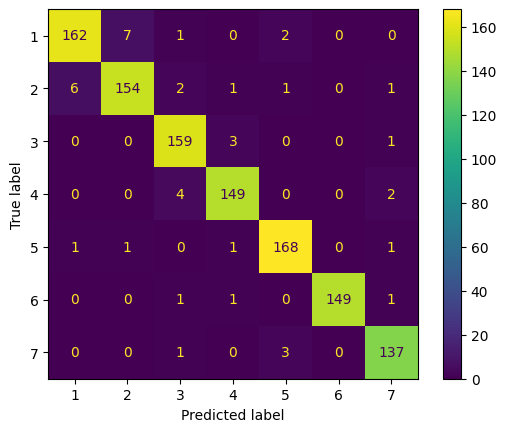

In [4]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

conf_mat = np.array(confusion_matrix(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()

In [5]:
accuracies = []

for n_estimators in range(1, 41):
    model = RandomForestClassifier(n_estimators=n_estimators)

    _ = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies += [n_estimators, accuracy],
    
accuracies = np.array(accuracies)

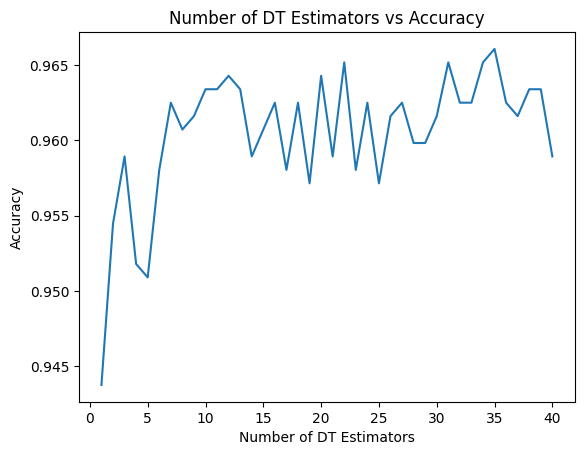

In [6]:
plt.title("Number of DT Estimators vs Accuracy")
plt.xlabel("Number of DT Estimators")
plt.ylabel("Accuracy")
plt.plot(*accuracies.T, label="Accuracy")
plt.show()


In [7]:
model_name = "random_forest"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))